In [1]:
%reload_ext autoreload
%aimport trochoid
%autoreload 1

In [11]:
import math
import numpy as np
# %matplotlib notebook
import matplotlib.pyplot as plt

plt.style.use('seaborn-colorblind')
plt.style.use('seaborn-whitegrid')


plt.rcParams['figure.figsize'] = 800/72,800/72
plt.rcParams["font.size"] = 21
# plt.rcParams["legend.loc"] = 'upper right'

import os
import sys
sys.path.append(os.getcwd())# 作業ティレクトリをパスに追加\n",
from trochoid import *

## トロコイド

定円の半径を $r_c$、動円の半径を $r_m$、回転角を $\theta$、描画点の半径を $r_d$ とする

外トロコイド: 

\begin{cases}
x=(r_{c}+r_{m})\cos \theta -r_{d}\cos \left({\cfrac {r_{c}+r_{m}}{r_{m}}}\theta \right),\\y=(r_{c}+r_{m})\sin \theta -r_{d}\sin \left({\cfrac {r_{c}+r_{m}}{r_{m}}}\theta \right),
\end{cases}

内トロコイド:

\begin{cases}
x=(r_{c}-r_{m})\cos \theta +r_{d}\cos \left({\cfrac  {r_{c}-r_{m}}{r_{m}}}\theta \right),\\y=(r_{c}-r_{m})\sin \theta -r_{d}\sin \left({\cfrac  {r_{c}-r_{m}}{r_{m}}}\theta \right),
\end{cases}

## 一般形トロコイド

描画円がなぞる曲線を$\boldsymbol{p}$とし，接線方向ベクトルは$\boldsymbol{t}$,法線方向ベクトルは$\boldsymbol{n}$とする

円の転がってきたパスの長さ$s$は

\begin{align}
s &= \sum_0^n \sqrt{dx[i]^2 + dy[i]^2}
\end{align}

と表される
描画円は滑らずに転がるため
\begin{align}
    r_m\theta &= s
\end{align}

したがって，
\begin{align}
\theta & = s/r_m \\
d\theta &= ds/r_m ,
\end{align}

となる．

点$p[i]$における接線ベクトル$t[i]$,法線ベクトル$n[i]$は

\begin{align}
t[i] &= \frac{p[i+1]-p[i-1]}{2} \\
n[i] &= \frac{t[i+1]-t[i-1]}{2} \\
&= \frac{p[i+2]-p[i-2]}{4}
\end{align}

描画円の中心の位置$p_m[i]$は単位法線ベクトル$n_u[i]$を用いて，
\begin{align}
p_m[i] &= p[i] + r_m n_u[i]
\end{align}

となる．ただし，$n_u[i]$は曲線の凹凸によって向きが反転する．これを避けるため，$n_u[i]$は改めて，
\begin{align}
n_u[i] &= R（\frac{\pi}{2}） t_u[i]
\end{align}
とする．ここで$R$はの回転行列である．

描画点の座標$p_d[i]$は

\begin{align}
p_d &= p_m[i] + r_d R(\theta[i]) e_x
\end{align}

となる．ここで$e_x$はx軸方向の単位ベクトルである

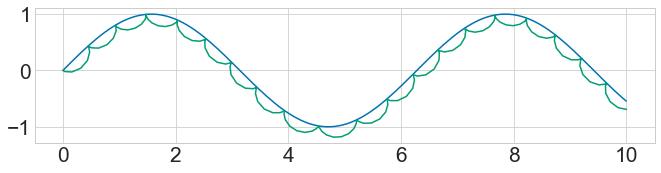

In [12]:
# trocoid along sin-curve
fig = plt.figure()
fig.add_subplot(1, 1, 1)
sq_info = {}
x=np.linspace(0,10,num=150)
y=np.sin(x)
plt.plot(x,y)
x,y = trochoid(px=x,py=y,rm=0.1,rd=0.1)
plt.plot(x,y)
fig.axes[0].set_aspect('equal', 'box')
# plt.savefig("masic.pdf")

36


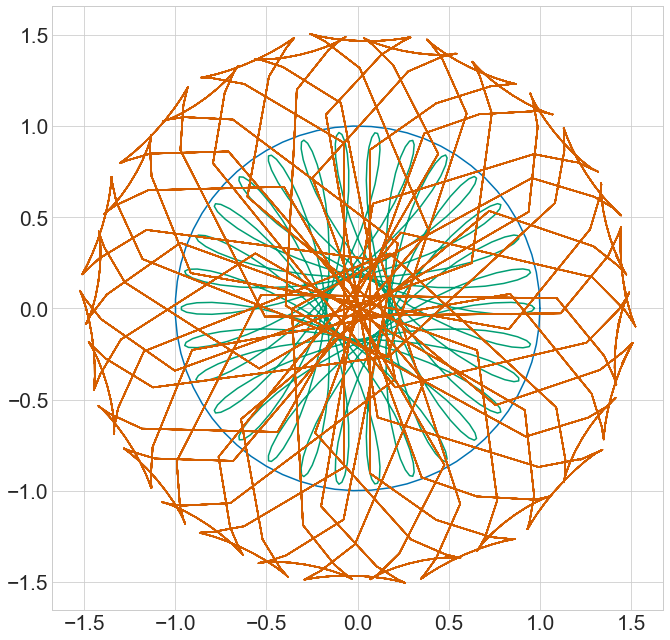

In [13]:
# trocid on path
fig = plt.figure()
fig.add_subplot(1, 1, 1)
sq_info = {}

x0,y0 = polygon(64, 1)
plt.plot(x0,y0)
x1,y1 = ctrochoid(rc=0.9, rm=0.99*1/3, rd=0.4,n=1024,outer=False)

print(lcm(9,4))
# print(plot_trochoid(rc=0.95, rm=0.3, rd=0.4,outer=False,rmax=0.98,n=100))
plt.plot(x1,y1)


# x,y=trochoid(rc=1.2, rm=1/3, rd=1/3,outer=False,n=100)
# plt.plot(x,y)
n = 7
# col_inverse = a[:, ::-1]
rm = path_length(x1,y1)/(2*np.pi)/n
x,y = trochoid(px=np.tile(x1,n),py=np.tile(y1,n),rm=rm,rd=0.02*rm)
plt.plot(x,y)

# x,y = ptrochoid(px=np.tile(x1,2),py=np.tile(y1,2),rm=0.1,rd=0.4)
# plt.plot(x,y)

# x2,y2 = trochoid(rc=0.9, rm=0.15/2, rd=1.2,n=1024)
# plt.plot(x2,y2)

# x,y = ptrochoid(px=np.tile(x2,12),py=np.tile(y2,12),rm=3,rd=0.4)
# plt.plot(x,y)

fig.axes[0].set_aspect('equal', 'box')
# plt.savefig("trocids002.pdf")


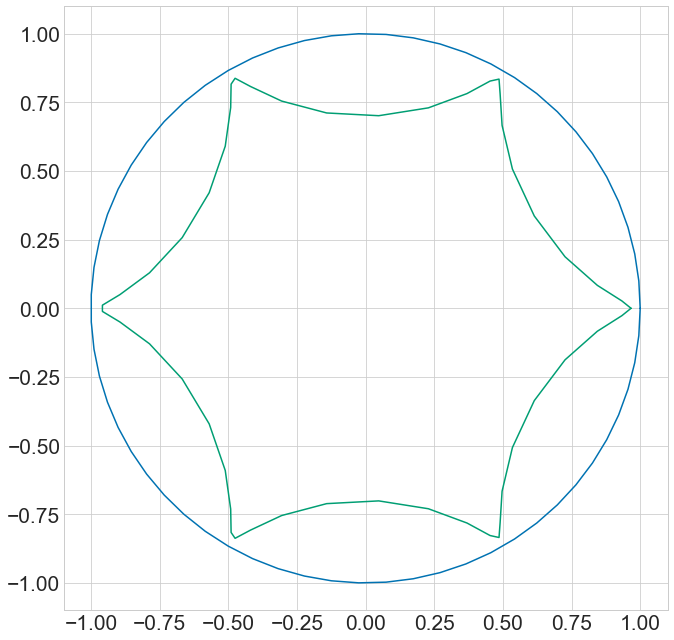

In [14]:
# trocid on path
fig = plt.figure()
fig.add_subplot(1, 1, 1)

x0,y0 = polygon(64, 1)
plt.plot(x0,y0)
x1,y1 = ctrochoid(rc=1, rm=1/6, rd=0.8*1/6,n=1024,outer=False)
plt.plot(x1,y1)
m = 7
n = 11/m
rm = path_length(x1,y1)/(2*np.pi)/n

fig.axes[0].set_aspect('equal', 'box')
plt.savefig("trocids002.pdf")


In [19]:
def demo_trochoid(px, py, rm, rd, right=True, rmax=None, orient=0, *args, **kwargs):
    x = np.zeros(len(px))
    y = np.zeros(len(py))
    s = 0
    theta = 0

    rot = np.pi/2
    if right is True:
        rot = -rot
    r_mat = np.matrix(
        [[np.cos(rot), -np.sin(rot)],
        [np.sin(rot), np.cos(rot)],]
    )

    for i in range(len(px)):
        ds = 0
        if i > 0:
            ds = np.linalg.norm(np.array([px[i]-px[i-1], py[i]-py[i-1]]))

        d_theta = ds/rm

        s = s+ds

        theta = theta + d_theta
        
        if (i - 1) < 0 :
            t = np.array([px[i+1]-px[i], py[i+1]-py[i]])
        elif (i+1) >= len(px):
            t = np.array([px[i]-px[i-1], py[i]-py[i-1]])
        else :
            t = np.array([px[i+1]-px[i-1], py[i+1]-py[i-1]])*0.5
        
        t = t/(np.linalg.norm(t) + 1e-9)
        n = np.dot(r_mat, np.reshape(t, (2, 1)))
        p_m = np.array([[px[i]], [py[i]]]) + rm*n

        r_ort = np.matrix(
            [[np.cos(theta), -np.sin(theta)],
            [np.sin(theta), np.cos(theta)],]
        )
        
        p_d = p_m + rd*np.dot(r_ort, np.array([[1], [0]]))
        x[i] = p_d.item(0)
        y[i] = p_d.item(1)
        
        if i %10 == 0:
            p_m=np.reshape(p_m,(1,-1))
            plt.plot(*polygon(n=32,r=rm,cx=p_m.item(0),cy=p_m.item(1),color='gray',alpha=0.5) )
            plt.plot([p_m.item(0),x[i]],[p_m.item(1),y[i]],'r-o')
            
        
#     info = {'rot': i}
    return (x,y)

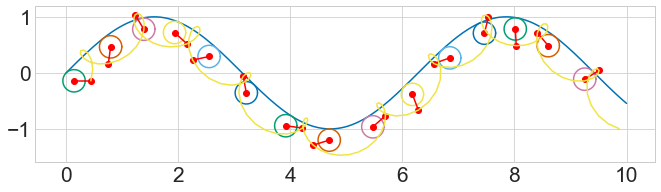

In [20]:
# trocoid along sin-curve
fig = plt.figure()
fig.add_subplot(1, 1, 1)
sq_info = {}
x=np.linspace(0,10,num=150)
y=np.sin(x)
plt.plot(x,y)
x,y = demo_trochoid(px=x,py=y,rm=0.2,rd=0.3)
plt.plot(x,y)
fig.axes[0].set_aspect('equal', 'box')
plt.savefig("torocoid_sin.pdf")